In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
! pip install -e ..

Obtaining file:///Users/mavrandr/FewShotLearning
  Found existing installation: fewshot 0.0.1
    Uninstalling fewshot-0.0.1:
      Successfully uninstalled fewshot-0.0.1
  Running setup.py develop for fewshot


In [3]:
import os

dataset_root = '.'
dataset_name = 'mini_imagenet'
csv_name = 'data.csv'

dataset_dir = os.path.join(dataset_root, dataset_name)

Let's take a look at the data:

In [4]:
import pandas as pd

dataframe = pd.read_csv(os.path.join(dataset_dir, csv_name))
dataframe.head()

,filepath,class
0,images/n0153282900000005.jpg,n01532829
1,images/n0153282900000006.jpg,n01532829
2,images/n0153282900000007.jpg,n01532829
3,images/n0153282900000010.jpg,n01532829
4,images/n0153282900000014.jpg,n01532829


In [5]:
classes = dataframe['class'].unique()
print(len(classes))
print(' | '.join(classes))

100
n01532829 | n01558993 | n01704323 | n01749939 | n01770081 | n01843383 | n01855672 | n01910747 | n01930112 | n01981276 | n02074367 | n02089867 | n02091244 | n02091831 | n02099601 | n02101006 | n02105505 | n02108089 | n02108551 | n02108915 | n02110063 | n02110341 | n02111277 | n02113712 | n02114548 | n02116738 | n02120079 | n02129165 | n02138441 | n02165456 | n02174001 | n02219486 | n02443484 | n02457408 | n02606052 | n02687172 | n02747177 | n02795169 | n02823428 | n02871525 | n02950826 | n02966193 | n02971356 | n02981792 | n03017168 | n03047690 | n03062245 | n03075370 | n03127925 | n03146219 | n03207743 | n03220513 | n03272010 | n03337140 | n03347037 | n03400231 | n03417042 | n03476684 | n03527444 | n03535780 | n03544143 | n03584254 | n03676483 | n03770439 | n03773504 | n03775546 | n03838899 | n03854065 | n03888605 | n03908618 | n03924679 | n03980874 | n03998194 | n04067472 | n04146614 | n04149813 | n04243546 | n04251144 | n04258138 | n04275548 | n04296562 | n04389033 | n04418357 | 

Visualization utils:

In [6]:
import matplotlib.pyplot as plt

def plot_batch(x, y, info=None):
    batch_size = len(x)
    annotations = []
    class_name = 'unknown'
    image_name = 'unknown'
    
    print(x.dtype, x.shape, batch_size)
    
    fig, ax = plt.subplots(ncols=batch_size, figsize=(6 * batch_size, 5))
    for index in range(batch_size):
        image = x[index]#.astype(int)
        if batch_size > 1:
            ax[index].imshow(image)
            ax[index].axis('off')
        else:
            ax.imshow(image)
            ax.axis('off')
            
        if info is not None:
            dataframe_index, class_name, image_name = info[index]
        
        annotation = r'#{} (sample №{}): IMG [{}] CLASS [{}]'.format(index, dataframe_index, image_name, class_name)
        annotations.append(annotation)
        
    print('\n'.join(annotations))
    plt.show()

## Dataset

Initialize common class for both of the operating modes -- batch and few-shot:

In [7]:
import tensorflow

In [8]:
from fewshot.data_provider import Dataset

dataset = Dataset(dataset_dir=dataset_dir)

### 1. Batch mode

In [9]:
train_dataset, test_dataset = dataset.split_by_objects()

Split by objects with train size = 0.5 (seed = 42)


/Users/mavrandr/anaconda3/envs/few_shot/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train data: 30000 samples
Test data:  30000 samples


You should pass float value from (0, 1) as test for size, and it will be interpreted as test ratio:

In [10]:
small_datast, _ = dataset.split_by_objects(train_size=0.01)

Split by objects with train size = 0.01 (seed = 42)
Train data: 600 samples
Test data:  59400 samples


In [11]:
train_dataset, test_dataset = small_datast.split_by_classes()

Split by classes with train size = 0.5 (seed = 42)
Train classes: 50
Test classes: 50
[620, 671, 706, 870, 1035, 702, 1220, 1271, 1306, 1470, 1635, 1302, 1820, 1871, 1906, 2070, 2235, 1902, 3620, 3671, 3706, 3870, 4035, 3702, 4820, 4871, 4906, 5070, 5235, 4902, 8420, 8471, 8506, 8670, 8835, 8502, 10220, 10271, 10306, 10470, 10635, 10302, 12020, 12071, 12106, 12270, 12435, 12102, 12620, 12671, 12706, 12870, 13035, 12702, 13820, 13871, 13906, 14070, 14235, 13902, 14420, 14471, 14506, 14670, 14835, 14502, 17420, 17471, 17506, 17670, 17835, 17502, 19220, 19271, 19306, 19470, 19635, 19302, 21620, 21671, 21706, 21870, 22035, 21702, 22220, 22271, 22306, 22470, 22635, 22302, 22820, 22871, 22906, 23070, 23235, 22902, 24620, 24671, 24706, 24870, 25035, 24702, 25820, 25871, 25906, 26070, 26235, 25902, 27620, 27671, 27706, 27870, 28035, 27702, 28820, 28871, 28906, 29070, 29235, 28902, 30020, 30071, 30106, 30270, 30435, 30102, 30620, 30671, 30706, 30870, 31035, 30702, 31220, 31271, 31306, 31470, 31

Passing number of test objects directly is not supported, as at learning representations stage all classes should be present in both train and test split, so train / test split must act like stratified split.

You can also get other split by setting random seed:

In [12]:
batch_generator = train_dataset.get_batch_generator(batch_size=4, 
                                                    target_size=(64, 64),
                                                    shuffle=True,
                                                    return_info=True)

In [13]:
def plot_multiple_batches(generator, num_batches=1):
    for batch_index in range(num_batches):
        print('Batch {}:'.format(batch_index + 1)) 
        plot_batch(*(next(generator)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch 1:
float32 (4, 64, 64, 3) 4
#0 (sample №40902): IMG [images/n0388860500000219.jpg] CLASS [n03888605]
#1 (sample №54706): IMG [images/n0679411000000238.jpg] CLASS [n06794110]
#2 (sample №34306): IMG [images/n0347668400000238.jpg] CLASS [n03476684]
#3 (sample №1470): IMG [images/n0170432300000590.jpg] CLASS [n01704323]


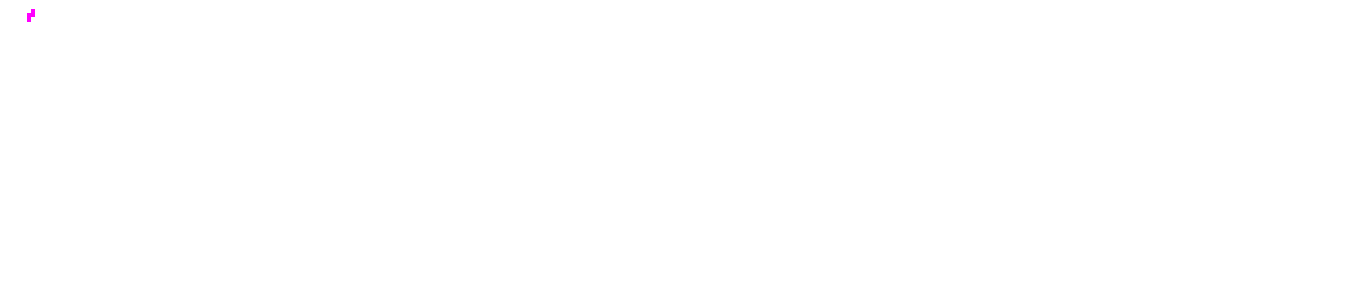

In [14]:
plot_multiple_batches(batch_generator)

We can also obtain an inner one-hot representation of a target value: 

In [15]:
from fewshot.algorithms.backbone_pretrain import simple_one_layer_cross_entropy_train
from fewshot.backbones import ConvNet

In [22]:
backbone = ConvNet(input_size=(64, 64, 3))

simple_one_layer_cross_entropy_train(
    backbone,
    train_dataset.get_batch_generator(batch_size=32, target_size=(64, 64), shuffle=True),
    validation_dataset=test_dataset.get_batch_generator(batch_size=32, target_size=(64, 64), shuffle=False)
)

10/10 [==============================] - 18s 2s/step - loss: 4.8501 - acc: 0.0267 - val_loss: 11.8125 - val_acc: 0.0167


### 5-way 2-shot

In [27]:
from fewshot.algorithms.fewshot_models import BaselineFewShotModel

In [28]:
model = BaselineFewShotModel(backbone, 5)

In [29]:
few_shot_dataset, _ = small_datast.split_by_classes(train_size=5) 
fewshot_train_dataset, fewshot_test_dataset = few_shot_dataset.split_by_objects(train_size=2)


model.fit(fewshot_train_dataset.get_batch_generator(batch_size=10, target_size=(64, 64)), n_epochs=100)

Split by classes with train size = 5 (seed = 42)
Train classes: 5
Test classes: 95
[8420, 8471, 8506, 8670, 8835, 8502, 30620, 30671, 30706, 30870, 31035, 30702, 36020, 36071, 36106, 36270, 36435, 36102, 42620, 42671, 42706, 42870, 43035, 42702, 55220, 55271, 55306, 55470, 55635, 55302]
Train data: 30 samples
Test data:  570 samples
Split by objects with train size = 2 (seed = 42)
Train data: 10 samples
Test data:  20 samples


/Users/mavrandr/anaconda3/envs/few_shot/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [31]:
model.predict(fewshot_test_dataset.get_batch_generator(batch_size=10, target_size=(64, 64)))

array([[-0.16377124, -0.11562825,  0.09214991,  0.01261244,  0.10916581],
       [-0.20620792, -0.09223606,  0.07004631,  0.09683981,  0.07566063],
       [-0.23173493, -0.06172612,  0.0348318 ,  0.10944398,  0.10458485],
       [-0.2345872 ,  0.01706429,  0.02979677,  0.04486379,  0.09520566],
       [-0.19758606, -0.11384723,  0.18351749,  0.0526308 , -0.00290265],
       [-0.24080266, -0.04641391,  0.06208422,  0.13058037,  0.04201214],
       [-0.2742456 ,  0.02389305,  0.05382844,  0.11454001,  0.02935303],
       [-0.23583904,  0.00333007,  0.06033208,  0.09142549,  0.02565484],
       [-0.24603161, -0.02609306,  0.03162309,  0.10712852,  0.08712915],
       [-0.23871529, -0.02773621,  0.03819294,  0.10788113,  0.07219103],
       [-0.16437712, -0.12559786,  0.07560456,  0.02595049,  0.13021263],
       [-0.2512908 , -0.01030034,  0.05460971,  0.11358489,  0.03922224],
       [-0.24547856, -0.00722023,  0.08690059,  0.1019612 ,  0.00189895],
       [-0.23273522, -0.0504812 ,  0.0

**Advanced augmentations**

For advanced augmentations -- mixups etc. -- you can set value of $n_{mix}$ to specify number of images used to produce a single transformed image:

In [30]:
train_dataset.dataframe['filepath'].astype(str).index[2465]

IndexError: index 2465 is out of bounds for axis 0 with size 300

In [ ]:
batch_generator = train_dataset.get_batch_generator(batch_size=4,
                                                    n_mix=2,
                                                    target_size=(64, 64),
                                                    shuffle=True,
                                                    return_info=True)

In [ ]:
plot_multiple_batches(batch_generator)

### 2. Few-shot mode

You can pass either float value from (0, 1) as test for size, and it will be interpreted as test ratio:

In [ ]:
train_dataset, test_dataset = dataset.split_by_classes(test_size=0.5)

... or integer defining number of test objects:

In [ ]:
train_dataset, test_dataset = dataset.split_by_classes(test_size=50)

You can set random seed as well:

In [ ]:
train_dataset, test_dataset = dataset.split_by_classes(test_size=0.5, random_state=0)

Alternatively, you can pass train and test classes directly:

In [21]:
train_classes, test_classes = classes[:150], classes[150:]

In [22]:
train_dataset, test_dataset = dataset.split_by_classes(train_classes=train_classes, test_classes=test_classes)

Train classes: 150
Test classes: 50
Train data: 4481 samples
Test data:  1552 samples


As for few-shot generator, you can additionally specify: 
* number of classes $n_{way}$
* number of support samples per class $k_{shot}$ 
* number of query samples per class *query_samples_per_class* (or opt for *None* to take them all)
* different augmentation parameters for support and query sets

In [23]:
few_shot_generator = train_dataset.get_few_shot_generator(n_way=2,
                                                          k_shot=3,
                                                          n_mix=2, 
                                                          query_samples_per_class=4,
                                                          support_generator_args={}, # augmentation parameters
                                                          query_generator_args={}, # query augmentation parameters
                                                          target_size=(64, 64),
                                                          shuffle=True,
                                                          return_info=True)

In [24]:
def plot_multiple_episodes(generator, num_episodes=1):
    for episode_index in range(num_episodes):
        print('Episode {}:'.format(episode_index + 1))
        support, query = next(generator)
        for sub_batch, sub_name in ((support, "support"), (query, "query")):
            print('{} set'.format(sub_name.capitalize()))
            plot_batch(*sub_batch)

Episode 1:
Support set
#0 (sample №986): IMG [images/035.Purple_Finch/Purple_Finch_0001_2237042103.jpg] CLASS [035.Purple_Finch]
#1 (sample №1000): IMG [images/035.Purple_Finch/Purple_Finch_0015_2367643402.jpg] CLASS [035.Purple_Finch]
#2 (sample №1002): IMG [images/035.Purple_Finch/Purple_Finch_0017_2254265069.jpg] CLASS [035.Purple_Finch]
#3 (sample №107): IMG [images/004.Groove_billed_Ani/Groove_billed_Ani_0020_2751385203.jpg] CLASS [004.Groove_billed_Ani]
#4 (sample №100): IMG [images/004.Groove_billed_Ani/Groove_billed_Ani_0013_3020033079.jpg] CLASS [004.Groove_billed_Ani]
#5 (sample №112): IMG [images/004.Groove_billed_Ani/Groove_billed_Ani_0025_1974827705.jpg] CLASS [004.Groove_billed_Ani]


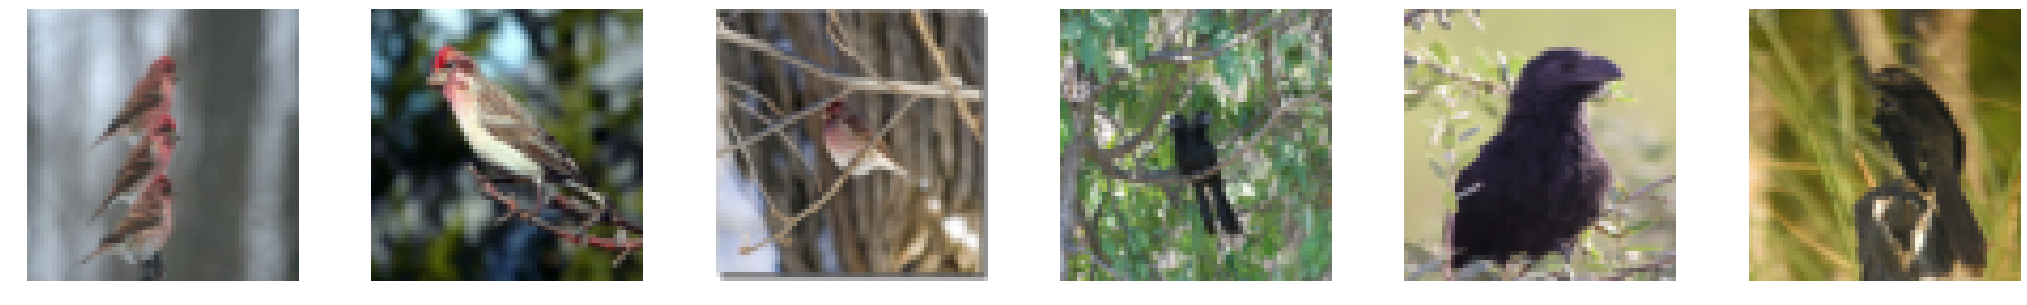

Query set
#0 (sample №1003): IMG [images/035.Purple_Finch/Purple_Finch_0018_2461574339.jpg] CLASS [035.Purple_Finch]
#1 (sample №1011): IMG [images/035.Purple_Finch/Purple_Finch_0026_437081065.jpg] CLASS [035.Purple_Finch]
#2 (sample №996): IMG [images/035.Purple_Finch/Purple_Finch_0011_2421716976.jpg] CLASS [035.Purple_Finch]
#3 (sample №997): IMG [images/035.Purple_Finch/Purple_Finch_0012_2960556842.jpg] CLASS [035.Purple_Finch]
#4 (sample №106): IMG [images/004.Groove_billed_Ani/Groove_billed_Ani_0019_2946094044.jpg] CLASS [004.Groove_billed_Ani]
#5 (sample №105): IMG [images/004.Groove_billed_Ani/Groove_billed_Ani_0018_1231743571.jpg] CLASS [004.Groove_billed_Ani]
#6 (sample №109): IMG [images/004.Groove_billed_Ani/Groove_billed_Ani_0022_335235776.jpg] CLASS [004.Groove_billed_Ani]
#7 (sample №98): IMG [images/004.Groove_billed_Ani/Groove_billed_Ani_0011_2405873446.jpg] CLASS [004.Groove_billed_Ani]


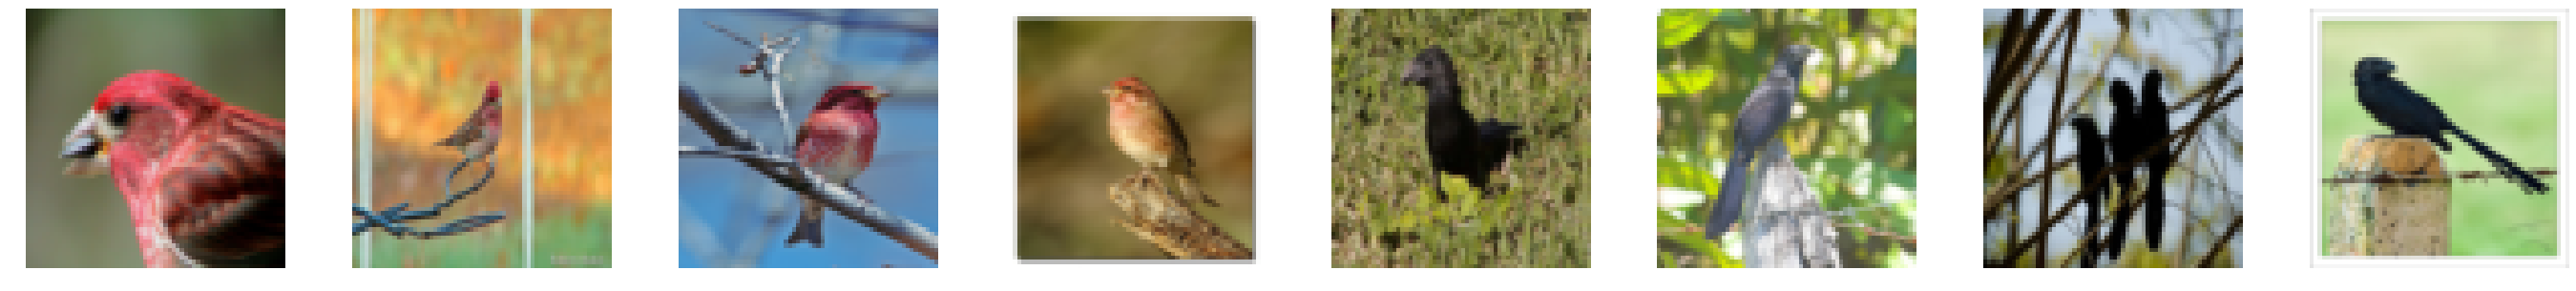

In [25]:
plot_multiple_episodes(few_shot_generator)